In [1]:
pip install numpy pandas statsmodels matplotlib.pyplot seaborn sklearn.cluster

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot


In [2]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [4]:
data = pd.read_csv("apartments_for_rent_classified_10K.csv", sep=";", encoding='cp1252')
data

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668626895,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",10,5.0,0,USD,No,Thumbnail,...,$790,Monthly,101,5,Washington,DC,38.9057,-76.9861,RentLingo,1577359415
1,5664597177,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",5,5.0,1,USD,No,Thumbnail,...,$425,Monthly,106,814 Schutte Rd,Evansville,IN,37.9680,-87.6621,RentLingo,1577017063
2,5668626833,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",5,1.0,0,USD,No,Thumbnail,...,"$1,390",Monthly,107,5,Arlington,VA,38.8910,-77.0816,RentLingo,1577359410
3,5659918074,housing/rent/apartment,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",7,1.0,0,USD,No,Thumbnail,...,$925,Monthly,116,1717 12th Avenue,Seattle,WA,47.6160,-122.3275,RentLingo,1576667743
4,5668626759,housing/rent/apartment,"Studio apartment Washington Blvd, N Cleveland ...","This unit is located at Washington Blvd, N Cle...",9,5.0,0,USD,No,Thumbnail,...,$880,Monthly,125,5,Arlington,VA,38.8738,-77.1055,RentLingo,1577359401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5630240092,housing/rent/apartment,Five BR 5407 Abbott Place - Abbott,This unit is located at 5407 Abbott Place - Ab...,5,4.0,5,USD,No,Thumbnail,...,"$6,000",Monthly,6300,5407 Abbott Place Abbott,Edina,MN,44.9000,-93.3233,RentLingo,1575112975
9996,5668640983,housing/rent/apartment,Six BR 256 Las Entradas,"This unit is located at 256 Las Entradas, Mont...",5,8.0,6,USD,No,Thumbnail,...,"$25,000",Monthly,8716,256 Las Entradas,Montecito,CA,34.4331,-119.6331,RentLingo,1577360419
9997,5668643292,housing/rent/apartment,Six BR 9908 Bentcross Drive,"This unit is located at 9908 Bentcross Drive, ...",5,8.5,6,USD,No,Thumbnail,...,"$11,000",Monthly,11318,9908 Bentcross Dr,Potomac,MD,39.0287,-77.2409,RentLingo,1577360560
9998,5668662559,housing/rent/apartment,One BR in New York NY 10069,"Monthly Rent$4,605 -to $4,790AmenitiesThe Aldy...","Basketball,Cable or Satellite,Doorman,Hot Tub,...",5.0,1,USD,No,Thumbnail,...,"$4,790",Monthly,40000,5,New York,NY,40.7716,-73.9876,Listanza,1577362186


In [5]:
# Using K-Means Clustering
x = data.iloc[:,5:7] # 1st for rows and second for columns
x

,bathrooms,bedrooms
0,5.0,0
1,5.0,1
2,1.0,0
3,1.0,0
4,5.0,0
...,...,...
9995,4.0,5
9996,8.0,6
9997,8.5,6
9998,5.0,1


In [6]:
kmeans = KMeans(3) # Creating three clusters
kmeans.fit(x)

KMeans(n_clusters=3)

In [7]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([2, 2, 0, ..., 1, 2, 0])

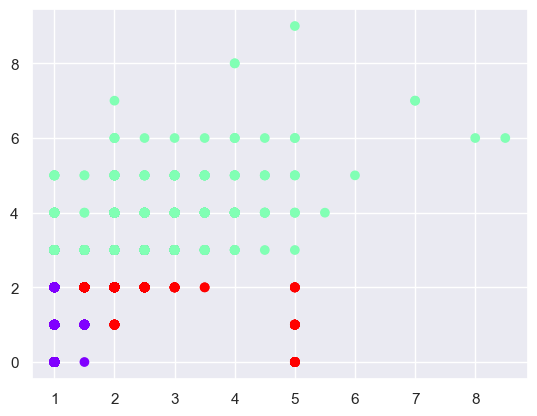

In [8]:
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['bathrooms'],data_with_clusters['bedrooms'],c=data_with_clusters['Clusters'],cmap='rainbow')